In [1]:
from CDAnalysis import parse_dsx,help_read_multifile,plot_dtemp_cd,tm_calc_cd
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
f_lst = list(Path(r"D:\AFMdata\ForceProteinDesign\CD\20241023-zb\20241023-zb\FN3_RGD_WT").rglob("*.dsx"))
data_dic = {}
for fname in f_lst:
    data = parse_dsx(fname)[0][0]
    if 'buf' in fname.stem.lower():
        k = 'buffer'
    else:
        k = float(round(data['Temperature'].mean(),1))
    dic = {k:data[k] for k in ['Wavelength_nm','CircularDichroism','Temperature']}
    df_new = pd.DataFrame(dic)
    data_dic[k] = df_new
new_dic = {}
if 'buffer' in data_dic.keys():
    for k,v in data_dic.items():
        if k == 'buffer':
            continue
        v['CircularDichroism'] = v['CircularDichroism']-data_dic['buffer']['CircularDichroism']
        new_dic[k] = v
k_lst = sorted(new_dic.keys())
cd = np.dstack([new_dic[k]['CircularDichroism'].to_list() for k in k_lst])[0]
wl = np.array(new_dic[k_lst[0]]['Wavelength_nm'].to_list())
wl = wl.reshape(wl.shape[0],1)
arr = np.concatenate([wl,cd],axis=1)
arr0 = np.array([0]+k_lst)
arr0 = arr0.reshape(1,arr0.shape[0])
arr = np.concatenate([arr0,arr])

--- Tm Calculation ---
Wavelength selected for fitting: 205.0 nm
Smart initial guess [a, Tm, b, c]: [-15.41, 69.00, 5.00, -3.46]
Fitted parameters: a=14.79, Tm=68.06, b=3.33, c=-18.41
R-squared: 0.9977
Final calculated Tm: 68.06 °C
----------------------



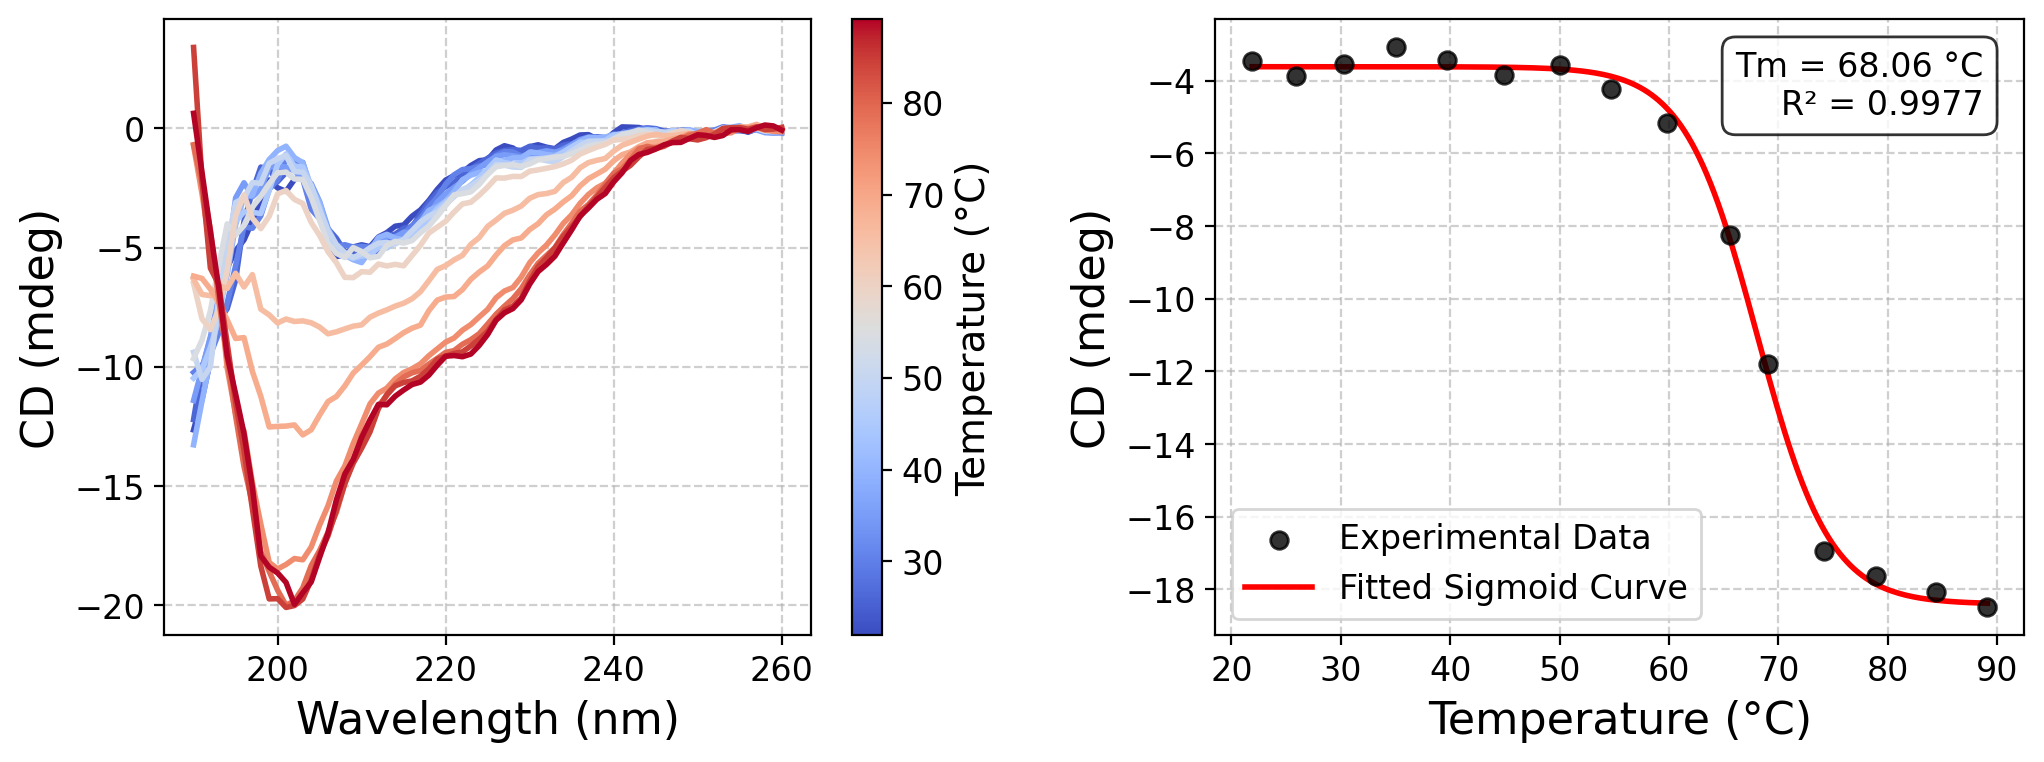

In [7]:
path = r"D:\AFMdata\ForceProteinDesign\CD\20241023-zb\20241023-zb\FN3_RGD_WT"
data = help_read_multifile(path)
fig,axs = plt.subplots(1,2,figsize=(12,4),dpi=200)
plt.subplots_adjust(wspace=0.3)
plot_dtemp_cd(ax=axs[0],data=data[1:,:],temp_lst=data[0,1:],smooth=5)
tm_calc_cd(data=data[1:-10,:],temp_lst=data[0,1:],wavelength='205',ax=axs[1])
plt.show()